In [5]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# We build the Heisenberg Hamiltonian in the product basis
J12 = 1
J23 = 1
J34 = 2
B = 0

term12 = (J12/4)*(tensor(sigmax(), sigmax(), qeye(2), qeye(2)) + tensor(sigmay(), sigmay(), qeye(2), qeye(2)) + tensor(sigmaz(), sigmaz(), qeye(2), qeye(2)) - tensor(qeye(2), qeye(2), qeye(2), qeye(2)))
term23 = (J23/4)*(tensor(qeye(2), sigmax(), sigmax(), qeye(2)) + tensor(qeye(2), sigmay(), sigmay(), qeye(2)) + tensor(qeye(2), sigmaz(), sigmaz(), qeye(2)) - tensor(qeye(2), qeye(2), qeye(2), qeye(2)))
term34 = (J34/4)*(tensor(qeye(2), qeye(2), sigmax(), sigmax()) + tensor(qeye(2), qeye(2), sigmay(), sigmay()) + tensor(qeye(2), qeye(2), sigmaz(), sigmaz()) - tensor(qeye(2), qeye(2), qeye(2), qeye(2)))
mfieldterm = B*(tensor(sigmaz(), qeye(2), qeye(2), qeye(2)) + tensor(qeye(2), sigmaz(), qeye(2), qeye(2)) + tensor(qeye(2), qeye(2), sigmaz(), qeye(2)) + tensor(qeye(2), qeye(2), qeye(2), sigmaz()))

# We define the Hamiltonian as Quantum Object class
H_QO = term12 + term23 + term34 + mfieldterm

# We define the Hamiltonian as numpy array class
H_A = np.array(H_QO)

In [7]:
# We want to see the tridiagonal shape of the Hamiltonian (Quantum Object)
H_QO

Quantum object: dims = [[2, 2, 2, 2], [2, 2, 2, 2]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.  -1.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   1.  -1.5  0.   0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.  -0.5  0.   0.5  0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.5  0.  -1.   0.   0.   0.   0.5  0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.5  0.  -2.   1.   0.   0.   0.5  0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.   1.  -1.5  0.   0.   0.   0.5  0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -0.5  0.   0.   0.   0.5  0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.5  0.   0.   0.  -0.5  0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.5  0.   0.   0.  -1.5  1.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.5  0.   0.   1.

In [8]:
# We change the type of the array, from complex to float
H_A = H_A.astype('float64')

<ipython-input-8-8c2e3f531a07>:2: ComplexWarning: Casting complex values to real discards the imaginary part
  H_A = H_A.astype('float64')


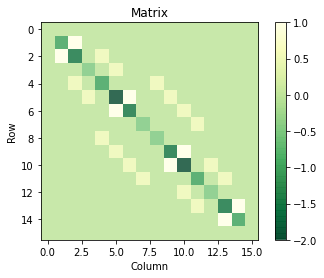

In [9]:
# We see how this looks like in a 2D plot, for this we have to turn into a
plt.figure()
plt.imshow(H_A, alpha=0.8, cmap='YlGn_r')
plt.xlabel('Column')
plt.ylabel('Row')
plt.title('Matrix')
plt.colorbar()

In [10]:
# We build the singlet and triplet vectors in the product basis (computational basis)
# These are all Quantum Objects
S = (basis(4,1) - basis(4,2)).unit()
T0 = (basis(4,1) + basis(4,2)).unit()
Tplus = basis(4,0)
Tminus = basis(4,3)

In [11]:
# We manually build the vector that we use in the basis of interest for the paper (TABLE I)
S0 = tensor(S,S)
S1 = (tensor(Tplus,Tminus) + tensor(Tminus,Tplus) - tensor(T0,T0)).unit()
T00 = tensor(S,T0)
T01 = tensor(T0,S)
T02 = (tensor(Tplus,Tminus) - tensor(Tminus,Tplus)).unit()
TP0 = tensor(S,Tplus)
TP1 = tensor(Tplus,S)
TP2 = (tensor(T0,Tplus) - tensor(Tplus,T0)).unit()
TM0 = tensor(S,Tminus)
TM1 = tensor(Tminus,S)
TM2 = (tensor(T0,Tminus) - tensor(Tminus,T0)).unit() 
Q0 = (tensor(Tplus,Tminus) + tensor(Tminus,Tplus) + 2*tensor(T0,T0)).unit()
QP = (tensor(T0,Tplus) + tensor(Tplus,T0)).unit()
QM = (tensor(T0,Tminus) + tensor(Tminus,T0)).unit()
QPP = tensor(Tplus,Tplus)
QMM = tensor(Tminus,Tminus)

In [12]:
QMM # This vector is dddd (d = down arrow), also characterized as 1111.

Quantum object: dims = [[4, 4], [1, 1]], shape = (16, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]

In [13]:
# We try how one of these vectors look like
print(S0)

# We see that if we want to access the vector as a numpy array (row!) list we have to do the following
print(np.array(S0.trans()[0][0]))

Quantum object: dims = [[4, 4], [1, 1]], shape = (16, 1), type = ket
Qobj data =
[[ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0.5]
 [-0.5]
 [ 0. ]
 [ 0. ]
 [-0.5]
 [ 0.5]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]]
[ 0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0.5+0.j -0.5+0.j  0. +0.j
  0. +0.j -0.5+0.j  0.5+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j]


In [14]:
# Now we create an emptey matrix that will be the one that we will use to change basis to the Hamiltonian
# So we want to add the 16 vectors that we obtained, ordered in rows, to this matrix
vecmat = np.zeros((16,16), dtype = complex)
vecmat[0,:] = S0.trans()[0][0]
vecmat[1,:] = S1.trans()[0][0]
vecmat[2,:] = T00.trans()[0][0]
vecmat[3,:] = T01.trans()[0][0]
vecmat[4,:] = T02.trans()[0][0]
vecmat[5,:] = TP0.trans()[0][0]
vecmat[6,:] = TP1.trans()[0][0]
vecmat[7,:] = TP2.trans()[0][0]
vecmat[8,:] = TM0.trans()[0][0]
vecmat[9,:] = TM1.trans()[0][0]
vecmat[10,:] = TM2.trans()[0][0]
vecmat[11,:] = Q0.trans()[0][0]
vecmat[12,:] = QP.trans()[0][0]
vecmat[13,:] = QM.trans()[0][0]
vecmat[14,:] = QPP.trans()[0][0]
vecmat[15,:] = QMM.trans()[0][0]

In [15]:
# We group them by same singlet/triplet/quintuplet close
"""
vecmat[0,:] = S0.trans()[0][0]
vecmat[1,:] = S1.trans()[0][0]
vecmat[2,:] = T00.trans()[0][0]
vecmat[3,:] = TP0.trans()[0][0]
vecmat[4,:] = TM0.trans()[0][0]
vecmat[5,:] = T01.trans()[0][0]
vecmat[6,:] = TP1.trans()[0][0]
vecmat[7,:] = TM1.trans()[0][0]
vecmat[8,:] = T02.trans()[0][0]
vecmat[9,:] = TP2.trans()[0][0]
vecmat[10,:] = TM2.trans()[0][0]
vecmat[11,:] = Q0.trans()[0][0]
vecmat[12,:] = QP.trans()[0][0]
vecmat[13,:] = QM.trans()[0][0]
vecmat[14,:] = QPP.trans()[0][0]
vecmat[15,:] = QMM.trans()[0][0]
"""

'\nvecmat[0,:] = S0.trans()[0][0]\nvecmat[1,:] = S1.trans()[0][0]\nvecmat[2,:] = T00.trans()[0][0]\nvecmat[3,:] = TP0.trans()[0][0]\nvecmat[4,:] = TM0.trans()[0][0]\nvecmat[5,:] = T01.trans()[0][0]\nvecmat[6,:] = TP1.trans()[0][0]\nvecmat[7,:] = TM1.trans()[0][0]\nvecmat[8,:] = T02.trans()[0][0]\nvecmat[9,:] = TP2.trans()[0][0]\nvecmat[10,:] = TM2.trans()[0][0]\nvecmat[11,:] = Q0.trans()[0][0]\nvecmat[12,:] = QP.trans()[0][0]\nvecmat[13,:] = QM.trans()[0][0]\nvecmat[14,:] = QPP.trans()[0][0]\nvecmat[15,:] = QMM.trans()[0][0]\n'

In [16]:
# We turn our numpy array amtrix into a Quantum object and we print it
VM = Qobj(vecmat)

In [17]:
print(VM)

Quantum object: dims = [[16], [16]], shape = (16, 16), type = oper, isherm = False
Qobj data =
[[ 0.          0.          0.          0.          0.          0.5
  -0.5         0.          0.         -0.5         0.5         0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.57735027  0.         -0.28867513
  -0.28867513  0.          0.         -0.28867513 -0.28867513  0.
   0.57735027  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.5
   0.5         0.          0.         -0.5        -0.5         0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.5
  -0.5         0.          0.          0.5        -0.5         0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.70710678  0.          0.
   0.          0.          0.          0.          0.          0.
  -0.70710678  0.          0. 

In [18]:
# We finally apply this matrix basis-transf to our Hamiltonian
Hp = H_QO.transform(VM) # Aparently vectors have to be in rows

In [19]:
# We print the Hamiltonian in the basis of interest (Quantum Object, Tridiagonal)
Hp
# See it is block diagonal (good)

Quantum object: dims = [[2, 2, 2, 2], [2, 2, 2, 2]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[-3.25        0.4330127   0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.4330127  -0.75        0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.         -1.25       -0.25        0.35355339  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.         -0.25       -2.25        0.35355339  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.35355339  0.35355339 -0.5         0.
   0.          0.          0.          0.          0.          0.
   0.          0.         

<ipython-input-20-27b1ff41dff1>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(np.array(Hp).astype('float64'), alpha=0.8, cmap='YlGn_r')


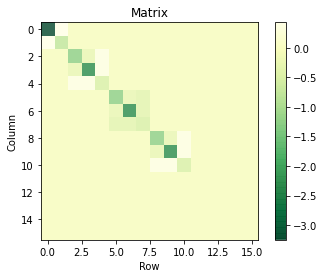

In [20]:
# We see how it looks in a color map
plt.figure()
plt.imshow(np.array(Hp).astype('float64'), alpha=0.8, cmap='YlGn_r')
plt.xlabel('Row')
plt.ylabel('Column')
plt.title('Matrix')
plt.colorbar()

In [21]:
# Now we need the manual transformation we did before but automated and general if possible
# Setting the Hamiltonian to J23 = 0 and diagonalizing the Hamiltonian will lead to the coupled basis
H_0 = term12 + term23 + term34 + mfieldterm # Check J23 = 0
states = H_0.eigenstates()

In [22]:
# We print the states obtained from this diagonalization
#print(states)

In [23]:
# We ge the states matrix in an array form
states_matrix = np.zeros((16, 16))
for i in range(16):
    states_matrix[i,:] = np.array(states[1][i].trans())[0]

<ipython-input-23-f548d26a3933>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  states_matrix[i,:] = np.array(states[1][i].trans())[0]


In [24]:
# Compare them with the actual ones (again after magnetic field)
print(np.array(states[1][0].trans())[0])
print(vecmat[15,:])

[ 0.        +0.j  0.        +0.j  0.        +0.j -0.09581999+0.j
  0.        +0.j  0.54097581+0.j -0.44515582+0.j  0.        +0.j
  0.        +0.j -0.44515582+0.j  0.54097581+0.j  0.        +0.j
 -0.09581999+0.j  0.        +0.j  0.        +0.j  0.        +0.j]
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]


In [25]:
print(np.array(states[1][1].trans())[0]) # This one is still not found
print(vecmat[10,:])

[ 0.        +0.j  0.        +0.j  0.        +0.j -0.00228448+0.j
  0.        +0.j  0.0087121 +0.j -0.00480375+0.j  0.0795342 +0.j
  0.        +0.j  0.00480375+0.j -0.0087121 +0.j -0.30331215+0.j
  0.00228448+0.j  0.77386683+0.j -0.55008889+0.j  0.        +0.j]
[ 0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0.5+0.j
  0. +0.j  0. +0.j  0. +0.j  0.5+0.j  0. +0.j -0.5+0.j -0.5+0.j  0. +0.j]


In [26]:
# We apply the transformation anyways
# We turn our numpy array amtrix into a Quantum object and we print it
SM = Qobj(states_matrix)
HSM = H_QO.transform(SM)

<ipython-input-27-9e4dbe629797>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(np.array(HSM).astype('float64'), alpha=0.8, cmap='YlGn_r')


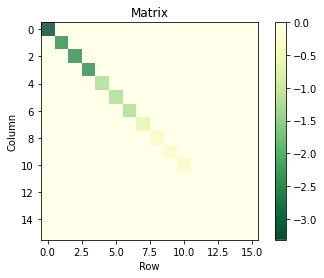

In [27]:
# We see how it looks in a color map
plt.figure()
plt.imshow(np.array(HSM).astype('float64'), alpha=0.8, cmap='YlGn_r')
plt.xlabel('Row')
plt.ylabel('Column')
plt.title('Matrix')
plt.colorbar()

In [28]:
# Now we try to get the CG coefficients by brute force (see Devanathan)
# Test for spin1/2 x spin1/2
def A(j1, j2, j):
    T1 = np.math.factorial(j1 + j2 - j)
    T2 = np.math.factorial(j + j1 - j2)
    T3 = np.math.factorial(j2 + j - j1)
    T4 = np.math.factorial(j1 + j2 + j + 1)
    return (T1*T2*T3)/T4

In [29]:
def B(j1, j2, j, m1, m2, m):
    if j1 + m1 >= 0 and j1 - m1 >= 0 and j2 + m2 >= 0 and j2 - m2 >= 0 and j + m >= 0 and j - m >= 0:
        T1 = np.math.factorial(j1 + m1)
        T2 = np.math.factorial(j1 - m1)
        T3 = np.math.factorial(j2 + m2)
        T4 = np.math.factorial(j2 - m2)
        T5 = np.math.factorial(j + m)
        T6 = np.math.factorial(j - m)
        return T1*T2*T3*T4*T5*T6
    else:
        return 0

In [30]:
def C(j1, j2, j, m1, m2, v):
    T1 = np.math.factorial(j1 + j2 - j - v)
    T2 = np.math.factorial(j1 - m1 - v)
    T3 = np.math.factorial(j2 + m2 - v)
    T4 = np.math.factorial(j - j2 + m1 + v)
    T5 = np.math.factorial(j - j1 - m2 + v)
    return T1*T2*T3*T4*T5

In [31]:
def CG(j1, j2, j, m1, m2, m):
    """It has been checked for spin1/2 x spin1/2 and it works"""
    if m == m1+m2:
        T1 = ((2*j + 1)*A(j1, j2, j)*B(j1, j2, j, m1, m2, m))**0.5
        T2 = 0
        for v in range(8): # this needs to be revised
            if j1 + j2 - j - v >= 0 and j1 - m1 - v >= 0 and j2 + m2 - v >= 0 and j - j2 + m1 + v >= 0 and j - j1 - m2 + v >= 0:
                T2 += (((-1)**v)*(C(j1, j2, j, m1, m2, v))**(-1))/np.math.factorial(v)
            else:
                continue
        return T1*T2
    else:
        return 0
# Note: when getting the full coefficients of a vector only the sum over say m1 needs to be done because m2 can be
# found by m = m1 + m2
# See next cell (update: not using this thing because otherwise we cannot use a for loop)

In [32]:
# Here we intend to calculate the vector |J=0,M=0> in the product basis
J0M0 = 0
n = 0
for m1 in 1/2,-1/2:
    for m2 in 1/2,-1/2:
        J0M0 += CG(1/2, 1/2, 0, m1, m2, 0)*basis(4,n)
        n+=1

In [33]:
J0M0

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.        ]
 [ 0.70710678]
 [-0.70710678]
 [ 0.        ]]

In [34]:
# We want to extend this for composition of multiple spin
# The for loop now has 3 layers and the Hilbert space has 8 basis vectors
# We intend to caluclate the vector V = |J12=1, J=3/2, M=1/2>
V = 0
n = 0
for m1 in 1/2,-1/2:
    for m2 in 1/2,-1/2:
        for m3 in 1/2,-1/2:
            m12 = m1 + m2
            V += CG(1/2, 1/2, 1, m1, m2, m12)*CG(1, 1/2, 3/2, m12, m3, 1/2)*basis(8,n)
            n +=1

In [35]:
V

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[0.        ]
 [0.57735027]
 [0.57735027]
 [0.        ]
 [0.57735027]
 [0.        ]
 [0.        ]
 [0.        ]]

In [36]:
# So far everything works, let's try to recover the vectors in 'vecmat' looping for four spin projections
# We will start with the first one
element0 = 0
n = 0

# Always valid
j1=1/2
j2=1/2
j3=1/2
j4=1/2

for m1 in 1/2,-1/2:
    for m2 in 1/2,-1/2:
        for m3 in 1/2,-1/2:
            for m4 in 1/2,-1/2:
                m12 = m1 + m2
                m123 = m12 + m3
                
                # This is just to test the first vector: j12=0, j123=1/2, j=0, m=0
                j12=0
                j123=1/2
                j=0
                m=0
                
                element0 += (CG(j1, j2, j12, m1, m2, m12)*CG(j12, j3, j123, m12, m3, m123)*CG(j123, j4, j, m123, m4, m))*basis(16, n)
                n+=1

In [37]:
# Seems that it works for the first eignevector
print(element0, Qobj(vecmat[0,:]))

Quantum object: dims = [[16], [1]], shape = (16, 1), type = ket
Qobj data =
[[ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0.5]
 [-0.5]
 [ 0. ]
 [ 0. ]
 [-0.5]
 [ 0.5]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]] Quantum object: dims = [[16], [1]], shape = (16, 1), type = ket
Qobj data =
[[ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0.5]
 [-0.5]
 [ 0. ]
 [ 0. ]
 [-0.5]
 [ 0.5]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]]


In [38]:
# It seems to work, now we want to create a matrix with all the eigenvectors
# We first create an empty matrix 16 x 16
fourspinmat = np.zeros((16,16), dtype = complex)
# Now we put the individual total spin values
j1 = 1/2
j2 = 1/2
j3 = 1/2
j4 = 1/2
spins = 4
labels = np.zeros((16,4), dtype = float) # list of 4 labels for the 16 vectors (each vector (labels) in a row)

In [39]:
# We define a composition function that gives us the total possible spins of a coupling of two spins
def compose(j1, j2):
    list12 = np.array([])

    n12 = 0
    while j1+j2-n12 >= 0 and j1+j2-n12 >= j1-j2:
        element12 = j1+j2-n12
        list12 = np.append(list12, element12)
        n12 += 1
    list12 = np.sort(list12)
    return list12

In [40]:
# Now we proceed to couple them in order
comp12 = compose(j1, j2)
u = 0

for totalspin12 in comp12:
    comp23 = compose(totalspin12, j3)
    for totalspin123 in comp23:
        comp34 = compose(totalspin123, j4)
        for totalspin in comp34:
            k = 0
            while totalspin - k >= -totalspin:
                labels[u,0] = totalspin12
                labels[u,1] = totalspin123
                labels[u,2] = totalspin
                labels[u,3] = totalspin-k
                k +=1
                u +=1

In [41]:
# We check the labels matrix (sorted: j12, j123, j, m)
print(labels)

[[ 0.   0.5  0.   0. ]
 [ 0.   0.5  1.   1. ]
 [ 0.   0.5  1.   0. ]
 [ 0.   0.5  1.  -1. ]
 [ 1.   0.5  0.   0. ]
 [ 1.   0.5  1.   1. ]
 [ 1.   0.5  1.   0. ]
 [ 1.   0.5  1.  -1. ]
 [ 1.   1.5  1.   1. ]
 [ 1.   1.5  1.   0. ]
 [ 1.   1.5  1.  -1. ]
 [ 1.   1.5  2.   2. ]
 [ 1.   1.5  2.   1. ]
 [ 1.   1.5  2.   0. ]
 [ 1.   1.5  2.  -1. ]
 [ 1.   1.5  2.  -2. ]]


In [42]:
# We order the array switching rows
labels[[1, 4]] = labels[[4, 1]]
labels[[3, 6]] = labels[[6, 3]]
labels[[4, 9]] = labels[[9, 4]]
labels[[6, 8]] = labels[[8, 6]]
labels[[7, 9]] = labels[[9, 7]]

In [43]:
print(labels)

[[ 0.   0.5  0.   0. ]
 [ 1.   0.5  0.   0. ]
 [ 0.   0.5  1.   0. ]
 [ 1.   0.5  1.   0. ]
 [ 1.   1.5  1.   0. ]
 [ 1.   0.5  1.   1. ]
 [ 1.   1.5  1.   1. ]
 [ 0.   0.5  1.   1. ]
 [ 0.   0.5  1.  -1. ]
 [ 1.   0.5  1.  -1. ]
 [ 1.   1.5  1.  -1. ]
 [ 1.   1.5  2.   2. ]
 [ 1.   1.5  2.   1. ]
 [ 1.   1.5  2.   0. ]
 [ 1.   1.5  2.  -1. ]
 [ 1.   1.5  2.  -2. ]]


In [44]:
# We can finally get the full st of vectors to the fourspinmat matrix (we get the vectors in rows)
# Always valid
j1=1/2
j2=1/2
j3=1/2
j4=1/2

for i in range(16): # Vector index
    eigenvector = 0 # We reset the eigenvector
    n = 0 # Basis index
    for m1 in 1/2,-1/2:
        for m2 in 1/2,-1/2:
            for m3 in 1/2,-1/2:
                for m4 in 1/2,-1/2:
                    m12 = m1 + m2
                    m123 = m12 + m3

                    j12 = labels[i,0] # first index vector index
                    j123 = labels[i,1]
                    j = labels[i,2]
                    m = labels[i,3]

                    eigenvector += (CG(j1, j2, j12, m1, m2, m12)*CG(j12, j3, j123, m12, m3, m123)*CG(j123, j4, j, m123, m4, m))*np.array(basis(16, n).trans())[0]
                    n+=1

    # Now we put the eigenvector into the matrix and follow with the next ones
    fourspinmat[i,:] = eigenvector

In [45]:
# We will try to correspond every vector in vecmat with the ones found here
print(fourspinmat[0,:])
print(vecmat[0,:])
# Singlet

[ 0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0.5+0.j -0.5+0.j  0. +0.j
  0. +0.j -0.5+0.j  0.5+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j]
[ 0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0.5+0.j -0.5+0.j  0. +0.j
  0. +0.j -0.5+0.j  0.5+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j]


In [46]:
print(fourspinmat[1,:])
print(vecmat[5,:])
# Triplet 2

[ 0.        +0.j  0.        +0.j  0.        +0.j  0.57735027+0.j
  0.        +0.j -0.28867513+0.j -0.28867513+0.j  0.        +0.j
  0.        +0.j -0.28867513+0.j -0.28867513+0.j  0.        +0.j
  0.57735027+0.j  0.        +0.j  0.        +0.j  0.        +0.j]
[ 0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
  0.70710678+0.j  0.        +0.j  0.        +0.j  0.        +0.j
 -0.70710678+0.j  0.        +0.j  0.        +0.j  0.        +0.j
  0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]


In [47]:
print(fourspinmat[2,:])
print(vecmat[2,:])
# Triplet 1

[ 0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0.5+0.j  0.5+0.j  0. +0.j
  0. +0.j -0.5+0.j -0.5+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j]
[ 0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0.5+0.j  0.5+0.j  0. +0.j
  0. +0.j -0.5+0.j -0.5+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j]


In [48]:
print(fourspinmat[3,:])
print(vecmat[8,:])
# Triplet 3

[ 0.        +0.j  0.        +0.j  0.        +0.j  0.57735027+0.j
  0.        +0.j -0.28867513+0.j  0.28867513+0.j  0.        +0.j
  0.        +0.j -0.28867513+0.j  0.28867513+0.j  0.        +0.j
 -0.57735027+0.j  0.        +0.j  0.        +0.j  0.        +0.j]
[ 0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
  0.        +0.j  0.        +0.j  0.        +0.j  0.70710678+0.j
  0.        +0.j  0.        +0.j  0.        +0.j -0.70710678+0.j
  0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]


In [49]:
print(fourspinmat[4,:])
print(vecmat[1,:])
# Singlet

[ 0.        +0.j  0.        +0.j  0.        +0.j  0.40824829+0.j
  0.        +0.j  0.40824829+0.j -0.40824829+0.j  0.        +0.j
  0.        +0.j  0.40824829+0.j -0.40824829+0.j  0.        +0.j
 -0.40824829+0.j  0.        +0.j  0.        +0.j  0.        +0.j]
[ 0.        +0.j  0.        +0.j  0.        +0.j  0.57735027+0.j
  0.        +0.j -0.28867513+0.j -0.28867513+0.j  0.        +0.j
  0.        +0.j -0.28867513+0.j -0.28867513+0.j  0.        +0.j
  0.57735027+0.j  0.        +0.j  0.        +0.j  0.        +0.j]


In [50]:
print(fourspinmat[5,:]) # This one does not correspond to any
print(vecmat[5,:])

[ 0.        +0.j  0.        +0.j  0.81649658+0.j  0.        +0.j
 -0.40824829+0.j  0.        +0.j  0.        +0.j  0.        +0.j
 -0.40824829+0.j  0.        +0.j  0.        +0.j  0.        +0.j
  0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
[ 0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
  0.70710678+0.j  0.        +0.j  0.        +0.j  0.        +0.j
 -0.70710678+0.j  0.        +0.j  0.        +0.j  0.        +0.j
  0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]


In [51]:
print(fourspinmat[6,:]) # Any
print(vecmat[15,:])

[ 0.        +0.j  0.8660254 +0.j -0.28867513+0.j  0.        +0.j
 -0.28867513+0.j  0.        +0.j  0.        +0.j  0.        +0.j
 -0.28867513+0.j  0.        +0.j  0.        +0.j  0.        +0.j
  0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]


In [52]:
print(fourspinmat[7,:]) # Any
print(vecmat[15,:])

[ 0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
  0.70710678+0.j  0.        +0.j  0.        +0.j  0.        +0.j
 -0.70710678+0.j  0.        +0.j  0.        +0.j  0.        +0.j
  0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]


In [53]:
print(fourspinmat[8,:]) # Any
print(vecmat[15,:])

[ 0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
  0.        +0.j  0.        +0.j  0.        +0.j  0.70710678+0.j
  0.        +0.j  0.        +0.j  0.        +0.j -0.70710678+0.j
  0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]


In [54]:
print(fourspinmat[9,:]) # Any
print(vecmat[3,:])

[ 0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
  0.        +0.j  0.        +0.j  0.        +0.j  0.40824829+0.j
  0.        +0.j  0.        +0.j  0.        +0.j  0.40824829+0.j
  0.        +0.j -0.81649658+0.j  0.        +0.j  0.        +0.j]
[ 0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0.5+0.j -0.5+0.j  0. +0.j
  0. +0.j  0.5+0.j -0.5+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j]


In [55]:
print(fourspinmat[10,:]) # Any
print(vecmat[3,:])

[ 0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
  0.        +0.j  0.        +0.j  0.        +0.j  0.28867513+0.j
  0.        +0.j  0.        +0.j  0.        +0.j  0.28867513+0.j
  0.        +0.j  0.28867513+0.j -0.8660254 +0.j  0.        +0.j]
[ 0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0.5+0.j -0.5+0.j  0. +0.j
  0. +0.j  0.5+0.j -0.5+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j]


In [56]:
print(fourspinmat[11,:])
print(vecmat[4,:])
# Quintuplet

[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
[ 0.        +0.j  0.        +0.j  0.        +0.j  0.70710678+0.j
  0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
  0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
 -0.70710678+0.j  0.        +0.j  0.        +0.j  0.        +0.j]


In [57]:
print(fourspinmat[12,:])
print(vecmat[12,:])
# Quintuplet

[0. +0.j 0.5+0.j 0.5+0.j 0. +0.j 0.5+0.j 0. +0.j 0. +0.j 0. +0.j 0.5+0.j
 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]
[0. +0.j 0.5+0.j 0.5+0.j 0. +0.j 0.5+0.j 0. +0.j 0. +0.j 0. +0.j 0.5+0.j
 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]


In [58]:
print(fourspinmat[13,:])
print(vecmat[11,:])
# Quintuplet

[0.        +0.j 0.        +0.j 0.        +0.j 0.40824829+0.j
 0.        +0.j 0.40824829+0.j 0.40824829+0.j 0.        +0.j
 0.        +0.j 0.40824829+0.j 0.40824829+0.j 0.        +0.j
 0.40824829+0.j 0.        +0.j 0.        +0.j 0.        +0.j]
[0.        +0.j 0.        +0.j 0.        +0.j 0.40824829+0.j
 0.        +0.j 0.40824829+0.j 0.40824829+0.j 0.        +0.j
 0.        +0.j 0.40824829+0.j 0.40824829+0.j 0.        +0.j
 0.40824829+0.j 0.        +0.j 0.        +0.j 0.        +0.j]


In [59]:
print(fourspinmat[14,:])
print(vecmat[13,:])
# Quintuplet

[0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0.5+0.j 0. +0.j
 0. +0.j 0. +0.j 0.5+0.j 0. +0.j 0.5+0.j 0.5+0.j 0. +0.j]
[0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0.5+0.j 0. +0.j
 0. +0.j 0. +0.j 0.5+0.j 0. +0.j 0.5+0.j 0.5+0.j 0. +0.j]


In [60]:
print(fourspinmat[15,:])
print(vecmat[15,:])
# Quintuplet

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]


In [61]:
# We will try with these eigenvectors obtained to change basis
FSM = Qobj(fourspinmat)
HM = H_QO.transform(FSM) # Aparently vectors have to be in rows

In [62]:
HM

Quantum object: dims = [[2, 2, 2, 2], [2, 2, 2, 2]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[-3.25        0.4330127   0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.4330127  -0.75        0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.         -1.25        0.4330127   0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.4330127  -1.41666667  0.94280904  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.94280904 -1.33333333  0.
   0.          0.          0.          0.          0.          0.
   0.          0.         

<ipython-input-63-10a1634b0467>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(np.array(HM).astype('float64'), alpha=0.8, cmap='YlGn_r')


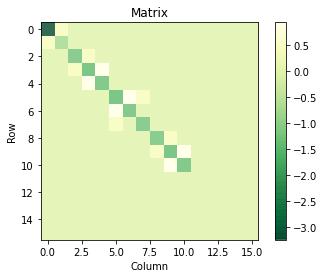

In [63]:
# We see how this looks like in a 2D plot
plt.figure()
plt.imshow(np.array(HM).astype('float64'), alpha=0.8, cmap='YlGn_r')
plt.xlabel('Column')
plt.ylabel('Row')
plt.title('Matrix')
plt.colorbar()

In [64]:
# We finally repeat the process but instead of composing J12 J123 J M we will use J12 J34 J M. We should see TABLE I states

# It seems to work, now we want to create a matrix with all the eigenvectors
# We first create an empty matrix 16 x 16
fourspinmat = np.zeros((16,16), dtype = complex)
# Now we put the individual total spin values
j1 = 1/2
j2 = 1/2
j3 = 1/2
j4 = 1/2
spins = 4
labels = np.zeros((16,4), dtype = float) # list of 4 labels for the 16 vectors (each vector (labels) in a row)

# We input the labels matrix by hand
labels[0][0] = 0
labels[0][1] = 0
labels[0][2] = 0
labels[0][3] = 0

labels[1][0] = 1
labels[1][1] = 1
labels[1][2] = 0
labels[1][3] = 0

labels[2][0] = 0
labels[2][1] = 1
labels[2][2] = 1
labels[2][3] = 0

labels[3][0] = 1
labels[3][1] = 0
labels[3][2] = 1
labels[3][3] = 0

labels[4][0] = 1
labels[4][1] = 1
labels[4][2] = 1
labels[4][3] = 0

labels[5][0] = 0
labels[5][1] = 1
labels[5][2] = 1
labels[5][3] = 1

labels[6][0] = 1
labels[6][1] = 0
labels[6][2] = 1
labels[6][3] = 1

labels[7][0] = 1
labels[7][1] = 1
labels[7][2] = 1
labels[7][3] = 1

labels[8][0] = 0
labels[8][1] = 1
labels[8][2] = 1
labels[8][3] = -1

labels[9][0] = 1
labels[9][1] = 0
labels[9][2] = 1
labels[9][3] = -1

labels[10][0] = 1
labels[10][1] = 1
labels[10][2] = 1
labels[10][3] = -1

labels[11][0] = 1
labels[11][1] = 1
labels[11][2] = 2
labels[11][3] = -2

labels[12][0] = 1
labels[12][1] = 1
labels[12][2] = 2
labels[12][3] = -1

labels[13][0] = 1
labels[13][1] = 1
labels[13][2] = 2
labels[13][3] = 0

labels[14][0] = 1
labels[14][1] = 1
labels[14][2] = 2
labels[14][3] = 1

labels[15][0] = 1
labels[15][1] = 1
labels[15][2] = 2
labels[15][3] = 2

# We print
print(labels)

[[ 0.  0.  0.  0.]
 [ 1.  1.  0.  0.]
 [ 0.  1.  1.  0.]
 [ 1.  0.  1.  0.]
 [ 1.  1.  1.  0.]
 [ 0.  1.  1.  1.]
 [ 1.  0.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 0.  1.  1. -1.]
 [ 1.  0.  1. -1.]
 [ 1.  1.  1. -1.]
 [ 1.  1.  2. -2.]
 [ 1.  1.  2. -1.]
 [ 1.  1.  2.  0.]
 [ 1.  1.  2.  1.]
 [ 1.  1.  2.  2.]]


In [65]:
# We can finally get the full st of vectors to the fourspinmat matrix (we get the vectors in rows)
# However, now we use CG coefficients for J12 J34 J M.
# Always valid
j1=1/2
j2=1/2
j3=1/2
j4=1/2

for i in range(16): # Vector index
    eigenvector = 0 # We reset the eigenvector
    n = 0 # Basis index
    for m1 in 1/2,-1/2:
        for m2 in 1/2,-1/2:
            for m3 in 1/2,-1/2:
                for m4 in 1/2,-1/2:
                    m12 = m1 + m2
                    m34 = m3 + m4

                    j12 = labels[i,0] # first index vector index
                    j34 = labels[i,1]
                    j = labels[i,2]
                    m = labels[i,3]

                    eigenvector += (CG(j1, j2, j12, m1, m2, m12)*CG(j3, j4, j34, m3, m4, m34)*CG(j12, j34, j, m12, m34, m))*np.array(basis(16, n).trans())[0]
                    n+=1

    # Now we put the eigenvector into the matrix and follow with the next ones
    fourspinmat[i,:] = eigenvector

In [66]:
# We will try with these eigenvectors obtained to change basis
FSM = Qobj(fourspinmat)
HM = H_QO.transform(FSM) # Aparently vectors have to be in rows

In [67]:
HM

Quantum object: dims = [[2, 2, 2, 2], [2, 2, 2, 2]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[-3.25        0.4330127   0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.4330127  -0.75        0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.         -1.25       -0.25        0.35355339  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.         -0.25       -2.25        0.35355339  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.35355339  0.35355339 -0.5         0.
   0.          0.          0.          0.          0.          0.
   0.          0.         

<ipython-input-68-10a1634b0467>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(np.array(HM).astype('float64'), alpha=0.8, cmap='YlGn_r')


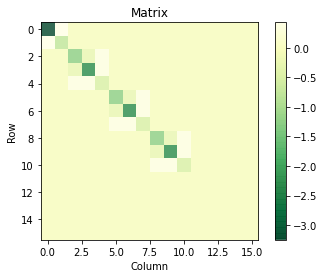

In [68]:
# We see how this looks like in a 2D plot
plt.figure()
plt.imshow(np.array(HM).astype('float64'), alpha=0.8, cmap='YlGn_r')
plt.xlabel('Column')
plt.ylabel('Row')
plt.title('Matrix')
plt.colorbar()

<ipython-input-69-b9c66891aeac>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(np.array(Hp).astype('float64'), alpha=0.8, cmap='YlGn_r')


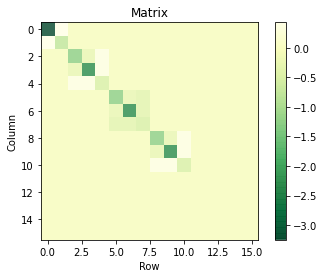

In [69]:
# We compare it with (manual) Hp again
# We see how it looks in a color map
plt.figure()
plt.imshow(np.array(Hp).astype('float64'), alpha=0.8, cmap='YlGn_r')
plt.xlabel('Row')
plt.ylabel('Column')
plt.title('Matrix')
plt.colorbar()

In [70]:
# Now that we get to have a basis that block diagonalizes our Hamiltonian we can keep going
# We may finish automatizing the process properly and migrating important functions into a separate file

In [5]:
# Now we need to order the 16 tensor products from the 4 states above and put them into a matrix
vec_list = [S, T0, Tplus, Tminus]
print(vec_list)
# Note that if use numpy arrays because the class becomes different from a Quantum Object

[Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.        ]
 [ 0.70710678]
 [-0.70710678]
 [ 0.        ]], Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.        ]
 [0.70710678]
 [0.70710678]
 [0.        ]], Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]], Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]]]


In [26]:
g = tensor(vector1, vector2)
print(g.trans()[0][0])
print(type(g.trans()[0][0]))

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
<class 'numpy.ndarray'>


In [7]:
# So now we do the tensor products and we put them (vectors) into a np.array called vectormatrix
vectormatrix = np.zeros((16,16), dtype = complex)
n = 0
for vector1 in vec_list:
    for vector2 in vec_list:
        #print(tensor(vector1, vector2).trans()[0][0])
        vectormatrix[:,n] = tensor(vector1, vector2).trans()[0][0] # vectormatrix[i,j] = vectormatrix[row,column]
        n += 1

In [30]:
QV = Qobj(vectormatrix)
print(QV)

Quantum object: dims = [[16], [16]], shape = (16, 16), type = oper, isherm = False
Qobj data =
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          1.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.70710678  0.70710678  0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.         -0.70710678  0.70710678  0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          1.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.70710678  0.          0.          0.
   0.70710678  0.          0.          0.          0.          0.
   0.          0.          0.          0.

In [15]:
# Once we have the matrix for the basios transformation we just have to basis transform

Hprime = H.transform(vectormatrix)

In [19]:
Hprime

Quantum object: dims = [[2, 2, 2, 2], [2, 2, 2, 2]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[-1.5         0.35355339  0.35355339  0.          0.35355339  0.
   0.          0.          0.35355339  0.          0.          0.
   0.          0.35355339 -0.35355339  0.        ]
 [ 0.35355339 -0.75       -0.25        0.          0.          0.35355339
   0.          0.          0.          0.35355339  0.          0.
   0.          0.          0.          0.        ]
 [ 0.35355339 -0.25       -0.75        0.          0.          0.
   0.35355339  0.          0.          0.          0.35355339  0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.         -1.          0.          0.
   0.          0.35355339  0.          0.          0.          0.35355339
   0.          0.35355339  0.35355339  0.        ]
 [ 0.35355339  0.          0.          0.         -1.          0.53033009
   0.1767767   0.          0.          0.1767767  -0.1767767   0.
  

In [22]:
I = sigmax()
ket1 = (basis(2,0) + basis(2,1)).unit()
ket2 = (7*basis(2,0) - basis(2,1)).unit()

In [23]:
ket1

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]

In [24]:
I

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [25]:
I.transform([ket1,ket2])

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.    0.6 ]
 [ 0.6  -0.28]]

In [26]:
vector_matrix = np.c_[ket1,ket2] # Here we lose the Quantum Object class

In [27]:
vector_matrix

array([[ 0.70710678+0.j,  0.98994949+0.j],
       [ 0.70710678+0.j, -0.14142136+0.j]])

In [81]:
I = sigmax()

In [82]:
I

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [29]:
I.transform(vector_matrix.transpose())

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.    0.6 ]
 [ 0.6  -0.28]]

In [24]:
H.eigenenergies()

array([-2.36602540e+00, -1.70710678e+00, -1.70710678e+00, -1.70710678e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -6.33974596e-01,
       -2.92893219e-01, -2.92893219e-01, -2.92893219e-01, -3.74842964e-17,
       -2.52254174e-17,  0.00000000e+00,  0.00000000e+00,  3.20257775e-16])

In [ ]:
H.eigenstates()

In [25]:
SS = tensor(S, S)

In [27]:
print(SS)

Quantum object: dims = [[4, 4], [1, 1]], shape = (16, 1), type = ket
Qobj data =
[[ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0.5]
 [-0.5]
 [ 0. ]
 [ 0. ]
 [-0.5]
 [ 0.5]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]]


In [28]:
ST0 = tensor(S, T0)

In [29]:
print(ST0)

Quantum object: dims = [[4, 4], [1, 1]], shape = (16, 1), type = ket
Qobj data =
[[ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0.5]
 [ 0.5]
 [ 0. ]
 [ 0. ]
 [-0.5]
 [-0.5]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]]


In [30]:
STplus = tensor(S, Tplus)

In [32]:
print(STplus)

Quantum object: dims = [[4, 4], [1, 1]], shape = (16, 1), type = ket
Qobj data =
[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.70710678]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [-0.70710678]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]


In [56]:
a = np.zeros((2,2))

In [57]:
print(a)

[[0. 0.]
 [0. 0.]]


In [58]:
a[0,:]=1

In [59]:
print(a)

[[1. 1.]
 [0. 0.]]
